In [1]:
import pandas as pd

# Load the dataset
file_path = 'matched_municipal_sites.xlsx'
data = pd.read_excel(file_path, sheet_name='Individual Sites')

# Display the first few rows of the dataset
print(data.head())

    LATITUDE  LONGITUDE         ORIG_ADDR      GEOCITY  GEOZIP GEOSTATE  \
0  38.275762 -86.963869    1110 S Main St  HUNTINGBURG   47542       IN   
1  38.659324 -87.168326   608 E Walnut St   WASHINGTON   47501       IN   
2  38.659687 -87.159600  1314 E Walnut St   WASHINGTON   47501       IN   
3  38.275262 -86.969047   501 W Sunset Dr  HUNTINGBURG   47542       IN   
4  39.042090 -87.165201       109 NW I St       LINTON   47441       IN   

  GEOCOUNTY                            utility_name utilitytype  \
0    DUBOIS  HUNTINGBURG MUNICIPAL ELECTRIC UTILITY   Municipal   
1   DAVIESS              WASHINGTON LIGHT AND POWER   Municipal   
2   DAVIESS              WASHINGTON LIGHT AND POWER   Municipal   
3    DUBOIS  HUNTINGBURG MUNICIPAL ELECTRIC UTILITY   Municipal   
4    GREENE              LINTON MUNICIPAL UTILITIES   Municipal   

   solarPotential.maxArrayPanelsCount  whole_sun_quant  \
0                         9052.885714           1232.0   
1                         6645

In [2]:
# Get a summary of the dataset
print(data.info())

# Get descriptive statistics for numerical columns
print(data.describe())

# Check for missing values
print(data.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 18 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   LATITUDE                                205 non-null    float64
 1   LONGITUDE                               205 non-null    float64
 2   ORIG_ADDR                               205 non-null    object 
 3   GEOCITY                                 205 non-null    object 
 4   GEOZIP                                  205 non-null    int64  
 5   GEOSTATE                                205 non-null    object 
 6   GEOCOUNTY                               205 non-null    object 
 7   utility_name                            205 non-null    object 
 8   utilitytype                             205 non-null    object 
 9   solarPotential.maxArrayPanelsCount      205 non-null    float64
 10  whole_sun_quant                         205 non-null    float6

Distribution of Solar Potential (Number of Panels)

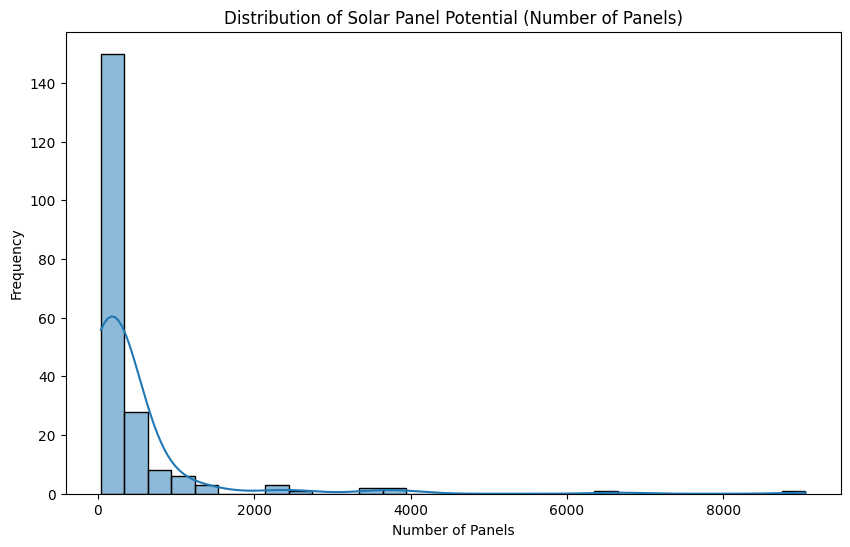

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot distribution of solar potential (number of panels)
plt.figure(figsize=(10, 6))
sns.histplot(data['solarPotential.maxArrayPanelsCount'], bins=30, kde=True)
plt.title('Distribution of Solar Panel Potential (Number of Panels)')
plt.xlabel('Number of Panels')
plt.ylabel('Frequency')
plt.show()

Bar Plot: Houses Powered by Site

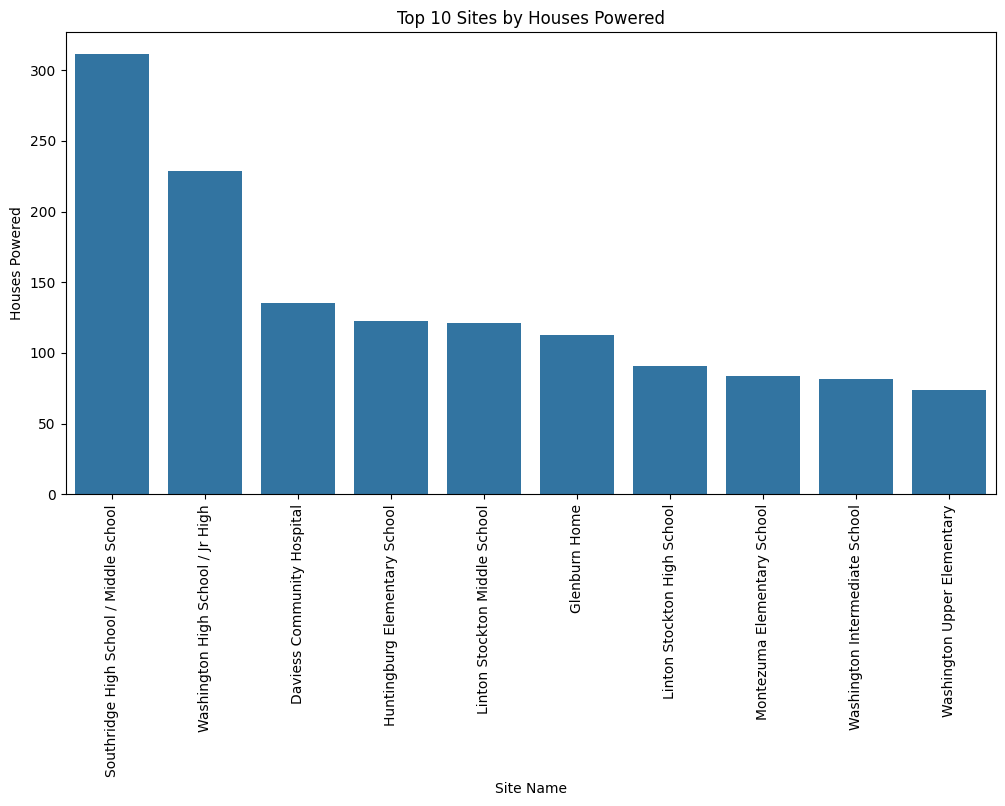

In [4]:
# Sort data by 'Houses Powered' and plot top 10 sites
top_sites = data.sort_values(by='Houses Powered', ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x='Matched Place Name', y='Houses Powered', data=top_sites)
plt.xticks(rotation=90)
plt.title('Top 10 Sites by Houses Powered')
plt.xlabel('Site Name')
plt.ylabel('Houses Powered')
plt.show()

In [5]:
# Total power generation across all sites (in kWH/year)
total_power_generation = data['Predicted Mean Annual Power (kWH/year)'].sum()
print(f'Total Power Generation across all sites: {total_power_generation:.2f} kWH/year')

# Total CO2 savings across all sites (in tons)
total_co2_savings = data['Annual CO2 Generation savings (ton)'].sum()
print(f'Total CO2 Savings across all sites: {total_co2_savings:.2f} tons/year')

# Average number of houses powered per site
average_houses_powered = data['Houses Powered'].mean()
print(f'Average number of houses powered per site: {average_houses_powered:.2f}')

Total Power Generation across all sites: 30128570.67 kWh/year
Total CO2 Savings across all sites: 21059.87 tons/year
Average number of houses powered per site: 13.91


# Geospatial Visualization

In [6]:
import folium
import pandas as pd
from folium.plugins import MarkerCluster

# Load the dataset (assuming it's already downloaded)
file_path = 'matched_municipal_sites.xlsx'
data = pd.read_excel(file_path, sheet_name='Individual Sites')

# Initialize a Folium map centered around Indiana (approximate center of Indiana)
m = folium.Map(location=[40.2672, -86.1349], zoom_start=7)

# Initialize MarkerCluster to group nearby markers
marker_cluster = MarkerCluster().add_to(m)

# Add markers for each solar site with enhanced tooltips and clustering
for index, row in data.iterrows():
    # Create a tooltip with key information (site name, power generation, CO2 savings)
    tooltip_text = (f"<b>{row['Matched Place Name']}</b><br>"
                    f"Power: {row['Predicted Mean Annual Power (kWH/year)']:.2f} kWH/year<br>"
                    f"CO2 Savings: {row['Annual CO2 Generation savings (ton)']:.2f} tons")

    # Add each marker to the marker cluster
    folium.Marker(
        location=[row['LATITUDE'], row['LONGITUDE']],
        popup=tooltip_text,
        tooltip=tooltip_text,  # Display tooltip on hover
        icon=folium.Icon(color='blue', icon='info-sign')
    ).add_to(marker_cluster)

# Save and display the map
m.save("solar_sites_clustered_map.html")
m

In [9]:
import folium
import pandas as pd
from folium.plugins import MarkerCluster
import ipywidgets as widgets
from IPython.display import display

# Load the dataset (assuming it's already downloaded)
file_path = 'matched_municipal_sites.xlsx'
data = pd.read_excel(file_path, sheet_name='Individual Sites')

# Define filtering widgets
city_widget = widgets.SelectMultiple(
    options=data['GEOCITY'].unique(),
    value=list(data['GEOCITY'].unique()),
    description='City',
    disabled=False
)

power_slider = widgets.FloatRangeSlider(
    value=[data['Predicted Mean Annual Power (kWH/year)'].min(), data['Predicted Mean Annual Power (kWH/year)'].max()],
    min=data['Predicted Mean Annual Power (kWH/year)'].min(),
    max=data['Predicted Mean Annual Power (kWH/year)'].max(),
    step=1000,
    description='Power Range',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='.0f'
)

co2_slider = widgets.FloatRangeSlider(
    value=[data['Annual CO2 Generation savings (ton)'].min(), data['Annual CO2 Generation savings (ton)'].max()],
    min=data['Annual CO2 Generation savings (ton)'].min(),
    max=data['Annual CO2 Generation savings (ton)'].max(),
    step=0.1,
    description='CO2 Savings Range',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='.1f'
)

# Function to update the map based on user input
def update_map(city_filter, power_range, co2_range):
    # Filter data based on user input
    filtered_data = data[
        (data['GEOCITY'].isin(city_filter)) &
        (data['Predicted Mean Annual Power (kWH/year)'] >= power_range[0]) &
        (data['Predicted Mean Annual Power (kWH/year)'] <= power_range[1]) &
        (data['Annual CO2 Generation savings (ton)'] >= co2_range[0]) &
        (data['Annual CO2 Generation savings (ton)'] <= co2_range[1])
    ]

    # Initialize a new Folium map centered around Indiana
    m = folium.Map(location=[40.2672, -86.1349], zoom_start=7)

    # Initialize MarkerCluster to group nearby markers
    marker_cluster = MarkerCluster().add_to(m)

    # Add markers for each filtered solar site with enhanced tooltips and clustering
    for index, row in filtered_data.iterrows():
        # Create a tooltip with key information (site name, power generation, CO2 savings)
        tooltip_text = (f"<b>{row['Matched Place Name']}</b><br>"
                        f"City: {row['GEOCITY']}<br>"
                        f"Power: {row['Predicted Mean Annual Power (kWH/year)']:.2f} kWH/year<br>"
                        f"CO2 Savings: {row['Annual CO2 Generation savings (ton)']:.2f} tons")

        # Add each marker to the marker cluster
        folium.Marker(
            location=[row['LATITUDE'], row['LONGITUDE']],
            popup=tooltip_text,
            tooltip=tooltip_text,
            icon=folium.Icon(color='blue', icon='info-sign')
        ).add_to(marker_cluster)

    # Display the map in the notebook
    display(m)

# Link widgets to the map update function
widgets.interactive(update_map, city_filter=city_widget, power_range=power_slider, co2_range=co2_slider)

# Display the widgets for filtering
display(city_widget, power_slider, co2_slider)

SelectMultiple(description='City', index=(0, 1, 2, 3), options=('HUNTINGBURG', 'WASHINGTON', 'LINTON', 'MONTEZ…

FloatRangeSlider(value=(11294.7054545454, 3288913.38), continuous_update=False, description='Power Range', max…

FloatRangeSlider(value=(7.89499911272727, 2298.95045262), continuous_update=False, description='CO2 Savings Ra…

In [8]:
save_button = widgets.Button(description="Save Map")
def save_map(b):
   m.save("filtered_solar_sites_map.html")

save_button.on_click(save_map)
display(save_button)

Button(description='Save Map', style=ButtonStyle())

In [31]:
import folium
import pandas as pd
from folium.plugins import MarkerCluster

# Load the dataset
file_path = 'matched_municipal_sites.xlsx'
data = pd.read_excel(file_path, sheet_name='Individual Sites')

# Initialize the Folium map centered around Indiana
m = folium.Map(location=[40.2672, -86.1349], zoom_start=7)

# Default visualization with MarkerCluster
marker_cluster = MarkerCluster().add_to(m)

for index, row in data.iterrows():
    # Tooltip with key information (site name, power generation, CO2 savings)
    tooltip_text = (f"<b>{row['Matched Place Name']}</b><br>"
                    f"Power: {row['Predicted Mean Annual Power (kWH/year)']:.2f} kWH/year<br>"
                    f"CO2 Savings: {row['Annual CO2 Generation savings (ton)']:.2f} tons")

    # Add each marker to the MarkerCluster
    folium.Marker(
        location=[row['LATITUDE'], row['LONGITUDE']],
        popup=tooltip_text,
        tooltip=tooltip_text,
        icon=folium.Icon(color='blue', icon='info-sign')
    ).add_to(marker_cluster)

# Adding Filters via FeatureGroups
# Define FeatureGroups for High, Medium, and Low power sites
high_power_group = folium.FeatureGroup(name="High Power (>50 Houses)", show=False)
medium_power_group = folium.FeatureGroup(name="Medium Power (20-50 Houses)", show=False)
low_power_group = folium.FeatureGroup(name="Low Power (<20 Houses)", show=False)

# Function to classify and add markers to appropriate FeatureGroups
def classify_and_add_markers(row):
    tooltip_text = (f"<b>{row['Matched Place Name']}</b><br>"
                    f"Power: {row['Predicted Mean Annual Power (kWH/year)']:.2f} kWH/year<br>"
                    f"CO2 Savings: {row['Annual CO2 Generation savings (ton)']:.2f} tons")
    if row['Houses Powered'] > 50:
        folium.Marker(
            location=[row['LATITUDE'], row['LONGITUDE']],
            popup=tooltip_text,
            tooltip=tooltip_text,
            icon=folium.Icon(color='green', icon='info-sign')
        ).add_to(high_power_group)
    elif 20 <= row['Houses Powered'] <= 50:
        folium.Marker(
            location=[row['LATITUDE'], row['LONGITUDE']],
            popup=tooltip_text,
            tooltip=tooltip_text,
            icon=folium.Icon(color='orange', icon='info-sign')
        ).add_to(medium_power_group)
    else:
        folium.Marker(
            location=[row['LATITUDE'], row['LONGITUDE']],
            popup=tooltip_text,
            tooltip=tooltip_text,
            icon=folium.Icon(color='red', icon='info-sign')
        ).add_to(low_power_group)

# Apply the classification to each row in the dataset
data.apply(classify_and_add_markers, axis=1)

# Add FeatureGroups to the map
high_power_group.add_to(m)
medium_power_group.add_to(m)
low_power_group.add_to(m)

# Add LayerControl for toggling filters
folium.LayerControl(collapsed=False).add_to(m)

# Save and display the map
m.save("solar_sites_clustered_map.html")
m

In [41]:
import folium
import pandas as pd
from folium.plugins import MarkerCluster

# Load the dataset
file_path = 'matched_municipal_sites.xlsx'
data = pd.read_excel(file_path, sheet_name='Individual Sites')

# Initialize the Folium map centered around Indiana
m = folium.Map(location=[40.2672, -86.1349], zoom_start=7)

# Add a title to the map
title_html = '''
    <h3 align="center" style="font-size:20px">
    <b>Community Solar Sites GIS Dashboard (Indiana)</b>
    </h3>
'''
m.get_root().html.add_child(folium.Element(title_html))

# Default visualization with MarkerCluster
marker_cluster = MarkerCluster(name="All Solar Sites").add_to(m)

# Tooltip and Markers for default MarkerCluster
for index, row in data.iterrows():
    tooltip_text = (f"<b>{row['Matched Place Name']}</b><br>"
                    f"Power: {row['Predicted Mean Annual Power (kWH/year)']:.2f} kWH/year<br>"
                    f"CO2 Savings: {row['Annual CO2 Generation savings (ton)']:.2f} tons<br>"
                    f"Houses Powered: {row['Houses Powered']}")
    folium.CircleMarker(
        location=[row['LATITUDE'], row['LONGITUDE']],
        radius=5,
        popup=tooltip_text,
        tooltip=tooltip_text,
        color='blue',
        fill=True,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(marker_cluster)

# Add Filters via FeatureGroups
# Filters for High, Medium, and Low Power
high_power_group = folium.FeatureGroup(name="High Power (>50 Houses)", show=False)
medium_power_group = folium.FeatureGroup(name="Medium Power (20-50 Houses)", show=False)
low_power_group = folium.FeatureGroup(name="Low Power (<20 Houses)", show=False)

# Filters for High, Medium, and Low CO2 Savings
high_co2_group = folium.FeatureGroup(name="High CO2 Savings (>100 tons)", show=False)
medium_co2_group = folium.FeatureGroup(name="Medium CO2 Savings (50-100 tons)", show=False)
low_co2_group = folium.FeatureGroup(name="Low CO2 Savings (<50 tons)", show=False)

# Classify and Add Markers for Power and CO2 Filters
def classify_and_add_markers(row):
    tooltip_text = (f"<b>{row['Matched Place Name']}</b><br>"
                    f"Power: {row['Predicted Mean Annual Power (kWH/year)']:.2f} kWH/year<br>"
                    f"CO2 Savings: {row['Annual CO2 Generation savings (ton)']:.2f} tons<br>"
                    f"Houses Powered: {row['Houses Powered']}")

    # Power Filters
    if row['Houses Powered'] > 50:
        folium.CircleMarker(
            location=[row['LATITUDE'], row['LONGITUDE']],
            radius=row['Houses Powered'] / 10,  # Dynamic size
            popup=tooltip_text,
            tooltip=tooltip_text,
            color='green',
            fill=True,
            fill_color='green',
            fill_opacity=0.6
        ).add_to(high_power_group)
    elif 20 <= row['Houses Powered'] <= 50:
        folium.CircleMarker(
            location=[row['LATITUDE'], row['LONGITUDE']],
            radius=row['Houses Powered'] / 10,
            popup=tooltip_text,
            tooltip=tooltip_text,
            color='orange',
            fill=True,
            fill_color='orange',
            fill_opacity=0.6
        ).add_to(medium_power_group)
    else:
        folium.CircleMarker(
            location=[row['LATITUDE'], row['LONGITUDE']],
            radius=row['Houses Powered'] / 10,
            popup=tooltip_text,
            tooltip=tooltip_text,
            color='red',
            fill=True,
            fill_color='red',
            fill_opacity=0.6
        ).add_to(low_power_group)

    # CO2 Savings Filters
    if row['Annual CO2 Generation savings (ton)'] > 100:
        folium.Marker(
            location=[row['LATITUDE'], row['LONGITUDE']],
            popup=tooltip_text,
            tooltip=tooltip_text,
            icon=folium.Icon(color='green', icon='leaf')
        ).add_to(high_co2_group)
    elif 50 <= row['Annual CO2 Generation savings (ton)'] <= 100:
        folium.Marker(
            location=[row['LATITUDE'], row['LONGITUDE']],
            popup=tooltip_text,
            tooltip=tooltip_text,
            icon=folium.Icon(color='orange', icon='leaf')
        ).add_to(medium_co2_group)
    else:
        folium.Marker(
            location=[row['LATITUDE'], row['LONGITUDE']],
            popup=tooltip_text,
            tooltip=tooltip_text,
            icon=folium.Icon(color='red', icon='leaf')
        ).add_to(low_co2_group)

# Apply classification
data.apply(classify_and_add_markers, axis=1)

# Add FeatureGroups to the map
high_power_group.add_to(m)
medium_power_group.add_to(m)
low_power_group.add_to(m)
high_co2_group.add_to(m)
medium_co2_group.add_to(m)
low_co2_group.add_to(m)

# Add LayerControl for toggling filters
folium.LayerControl(collapsed=False).add_to(m)

# Save and display the map
m.save("solar_sites_dashboard.html")
m

In [46]:
import folium
import pandas as pd
from folium.plugins import MarkerCluster, HeatMap

# Load the dataset
file_path = 'matched_municipal_sites.xlsx'
data = pd.read_excel(file_path, sheet_name='Individual Sites')

# Initialize the Folium map centered around Indiana
m = folium.Map(location=[40.2672, -86.1349], zoom_start=7)

# Add a title to the map
title_html = '''
    <h3 align="center" style="font-size:20px">
    <b>Community Solar Sites GIS Dashboard (Indiana)</b>
    </h3>
'''
m.get_root().html.add_child(folium.Element(title_html))

# Default visualization with MarkerCluster
marker_cluster = MarkerCluster(name="All Solar Sites").add_to(m)

# Tooltip and Markers for default MarkerCluster
for index, row in data.iterrows():
    tooltip_text = (f"<b>{row['Matched Place Name']}</b><br>"
                    f"Power: {row['Predicted Mean Annual Power (kWH/year)']:.2f} kWH/year<br>"
                    f"CO2 Savings: {row['Annual CO2 Generation savings (ton)']:.2f} tons<br>"
                    f"Houses Powered: {row['Houses Powered']}")
    folium.CircleMarker(
        location=[row['LATITUDE'], row['LONGITUDE']],
        radius=5,
        popup=tooltip_text,
        tooltip=tooltip_text,
        color='blue',
        fill=True,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(marker_cluster)

# Add Filters via FeatureGroups
# Filters for High, Medium, and Low Power
high_power_group = folium.FeatureGroup(name="High Power (>50 Houses)", show=False)
medium_power_group = folium.FeatureGroup(name="Medium Power (20-50 Houses)", show=False)
low_power_group = folium.FeatureGroup(name="Low Power (<20 Houses)", show=False)

# Filters for High, Medium, and Low CO2 Savings
high_co2_group = folium.FeatureGroup(name="High CO2 Savings (>100 tons)", show=False)
medium_co2_group = folium.FeatureGroup(name="Medium CO2 Savings (50-100 tons)", show=False)
low_co2_group = folium.FeatureGroup(name="Low CO2 Savings (<50 tons)", show=False)

# Classify and Add Markers for Power and CO2 Filters
def classify_and_add_markers(row):
    tooltip_text = (f"<b>{row['Matched Place Name']}</b><br>"
                    f"Power: {row['Predicted Mean Annual Power (kWH/year)']:.2f} kWH/year<br>"
                    f"CO2 Savings: {row['Annual CO2 Generation savings (ton)']:.2f} tons<br>"
                    f"Houses Powered: {row['Houses Powered']}")

    # Power Filters
    if row['Houses Powered'] > 50:
        folium.CircleMarker(
            location=[row['LATITUDE'], row['LONGITUDE']],
            radius=row['Houses Powered'] / 10,  # Dynamic size
            popup=tooltip_text,
            tooltip=tooltip_text,
            color='green',
            fill=True,
            fill_color='green',
            fill_opacity=0.6
        ).add_to(high_power_group)
    elif 20 <= row['Houses Powered'] <= 50:
        folium.CircleMarker(
            location=[row['LATITUDE'], row['LONGITUDE']],
            radius=row['Houses Powered'] / 10,
            popup=tooltip_text,
            tooltip=tooltip_text,
            color='orange',
            fill=True,
            fill_color='orange',
            fill_opacity=0.6
        ).add_to(medium_power_group)
    else:
        folium.CircleMarker(
            location=[row['LATITUDE'], row['LONGITUDE']],
            radius=row['Houses Powered'] / 10,
            popup=tooltip_text,
            tooltip=tooltip_text,
            color='red',
            fill=True,
            fill_color='red',
            fill_opacity=0.6
        ).add_to(low_power_group)

    # CO2 Savings Filters
    if row['Annual CO2 Generation savings (ton)'] > 100:
        folium.Marker(
            location=[row['LATITUDE'], row['LONGITUDE']],
            popup=tooltip_text,
            tooltip=tooltip_text,
            icon=folium.Icon(color='green', icon='leaf')
        ).add_to(high_co2_group)
    elif 50 <= row['Annual CO2 Generation savings (ton)'] <= 100:
        folium.Marker(
            location=[row['LATITUDE'], row['LONGITUDE']],
            popup=tooltip_text,
            tooltip=tooltip_text,
            icon=folium.Icon(color='orange', icon='leaf')
        ).add_to(medium_co2_group)
    else:
        folium.Marker(
            location=[row['LATITUDE'], row['LONGITUDE']],
            popup=tooltip_text,
            tooltip=tooltip_text,
            icon=folium.Icon(color='red', icon='leaf')
        ).add_to(low_co2_group)

# Apply classification
data.apply(classify_and_add_markers, axis=1)

# Add FeatureGroups to the map
high_power_group.add_to(m)
medium_power_group.add_to(m)
low_power_group.add_to(m)
high_co2_group.add_to(m)
medium_co2_group.add_to(m)
low_co2_group.add_to(m)

# Add Heatmap for Power Density
heat_data = data[['LATITUDE', 'LONGITUDE', 'Predicted Mean Annual Power (kWH/year)']].values.tolist()
HeatMap(heat_data, name="Heatmap (Power Density)", radius=15, max_zoom=13).add_to(m)

# Add LayerControl for toggling filters and layers
folium.LayerControl(collapsed=False).add_to(m)

# Save and display the map
m
m.save("solar_sites_dashboard.html")